# **TEXT MINING: CONVERTING UNSTRUCTURED DATA INTO MEANINGFUL DATA**
Text mining is a process of extracting meaningful information and patterns from large volumes of unstructured text data.

Introduction to Text Mining:
Definition: Text mining involves the analysis of natural language text to discover insights, patterns, and knowledge.

Applications:

Sentiment analysis
Topic modeling
Named entity recognition
Text classification
Information retrieval
Text Mining Process:
Data Collection:

Gather relevant text data from various sources like websites, social media, documents, etc.
Text Preprocessing:

Tokenization: Breaking text into words or phrases.
Stopword removal: Eliminating common words with little meaning.
Stemming/Lemmatization: Reducing words to their base or root form.
Text Representation:

Bag of Words (BoW): Representing text as a collection of words, ignoring order.
TF-IDF (Term Frequency-Inverse Document Frequency): Weighting words based on their importance in a document.
Exploratory Data Analysis (EDA):

Understand the distribution of words.
Identify common phrases or patterns.
Model Building:

Choose appropriate algorithms (Naive Bayes, SVM, etc.).
Train and evaluate the model using labeled data.
Topic Modeling:

Use techniques like Latent Dirichlet Allocation (LDA) to discover latent topics in a collection of documents.
Challenges in Text Mining:
Ambiguity and Polysemy: Words with multiple meanings.
Data Sparsity: Large feature space due to a vast vocabulary.
Noise and Redundancy: Unnecessary or repetitive information.
Tools and Libraries:
Programming Languages:

Python (NLTK, spaCy, scikit-learn)
R (tm, quanteda)
Visualization Tools:

Word clouds, bar charts, and heatmaps for EDA.
Case Studies:
Sentiment Analysis of Social Media Data:

Analyzing tweets or reviews to determine sentiment.
Topic Modeling on News Articles:

Discovering prevalent topics in a collection of news articles.
Future Trends:
Deep Learning in Text Mining:

Use of neural networks for improved performance.
Multimodal Text Mining:

Integration of text with other modalities like images or audio.

#### **Areas within text mining**
Social Media Evaluation:
Focuses on analyzing textual data from social media platforms.
Key goals include unraveling sentiments and identifying trends.
Involves sentiment analysis to understand the emotional tone expressed in social media content.

Semantic Analysis:
Involves deciphering word meanings in context.
Aims to understand the intended meaning of words and phrases within a given context.
Helps in extracting deeper insights and understanding from textual data.

Chatbots:
Utilizes text mining techniques to enhance the responsiveness of chatbots.
Enables chatbots to understand and generate contextually appropriate responses.
Improves the overall user experience in human-computer interactions.

Deep Learning for Text Analysis:
Employs deep learning algorithms for more advanced and nuanced text analysis.
Enables the model to learn intricate patterns and representations from textual data.
Enhances the capabilities of traditional text mining methods.

Machine Translation:
Facilitates the translation of text from one language to another.
Text mining plays a role in improving the accuracy and context-awareness of machine translation systems.
Enables better understanding and translation of idiomatic expressions.

Text Generation:
Involves using text mining techniques for content creation.
Generates human-like text based on learned patterns and structures from existing data.
Applied in various creative and informative contexts.

Information Extraction/Sentiment Analysis:
Focuses on extracting valuable information and insights from textual data.
Includes sentiment analysis, which helps discern emotions expressed in text.
Valuable for businesses in understanding customer feedback and market trends.

In [20]:
# install nltk library if requiered
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


Tokenized Words: ['text', 'mining', 'is', 'the', 'process', 'of', 'extracting', 'valuable', 'information', 'from', 'unstructured', 'text', 'data', '.', 'it', 'involves', 'various', 'techniques', 'such', 'as', 'tokenization', ',', 'stemming', ',', 'and', 'sentiment', 'analysis', '.']
Filtered Words: ['text', 'mining', 'process', 'extracting', 'valuable', 'information', 'unstructured', 'text', 'data', 'involves', 'various', 'techniques', 'tokenization', 'stemming', 'sentiment', 'analysis']
Frequency Distribution: <FreqDist with 15 samples and 16 outcomes>


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yeiso\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeiso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yeiso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


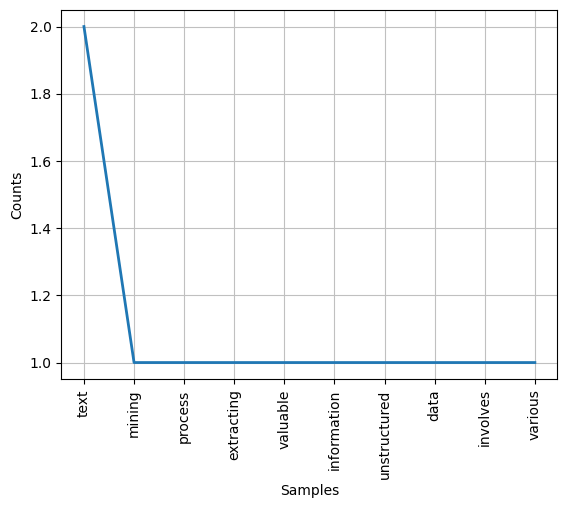

In [21]:
#import libraries requiered
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download required resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Sample text for analysis
text = """Text mining is the process of extracting valuable information from unstructured text data.
            It involves various techniques such as tokenization, stemming, and sentiment analysis."""

# Tokenization
words = word_tokenize(text.lower())  # Convert to lowercase for consistency
print("Tokenized Words:", words)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
print("Filtered Words:", filtered_words)

# Frequency Distribution
fdist = FreqDist(filtered_words)
print("Frequency Distribution:", fdist)

# Plot the top 10 most common words
fdist.plot(10, cumulative=False)
plt.show()


Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


Note: you may need to restart the kernel to use updated packages.



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yeiso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yeiso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yeiso\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


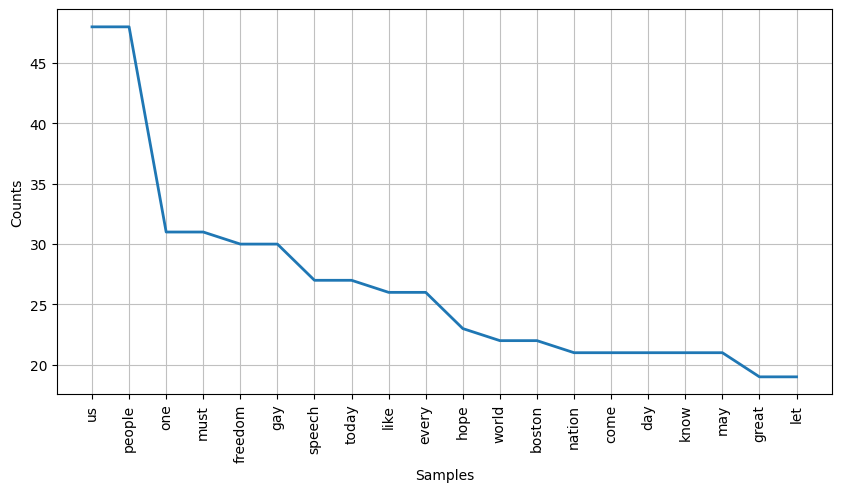

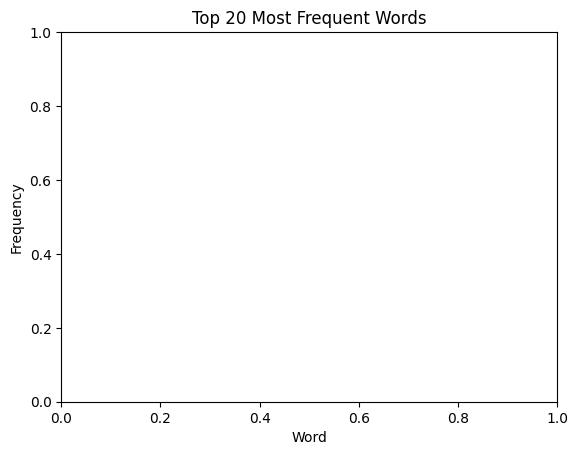

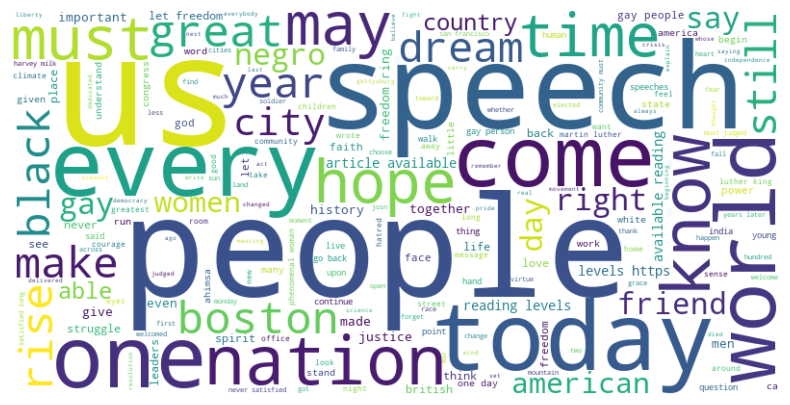

Sentiment Score: {'neg': 0.103, 'neu': 0.72, 'pos': 0.177, 'compound': 1.0}


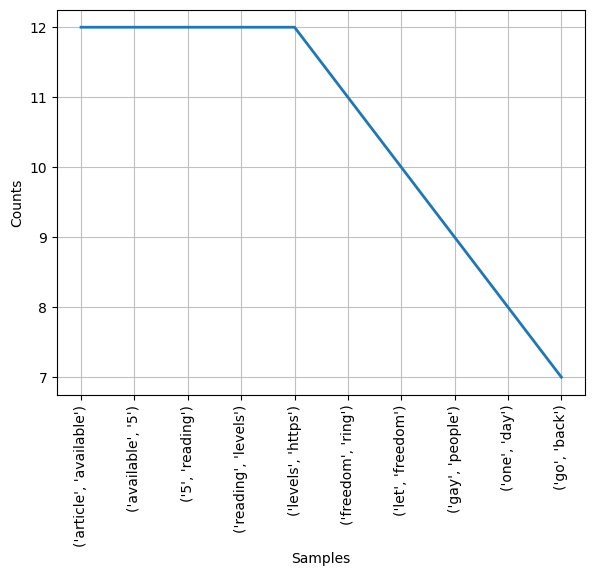

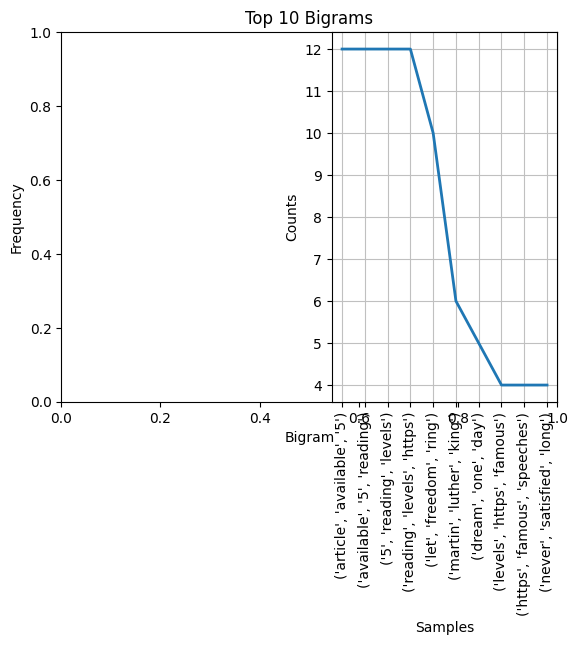

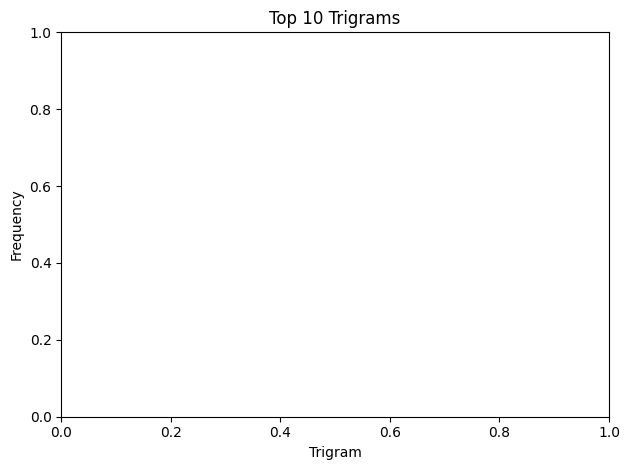

In [42]:
# install nltk and other libraries if requiered
%pip install
%pip install PyMuPDF
%pip install wordcloud

#import libraries requiered
import nltk

# Set NLTK data path
nltk.data.path.append('C:\\users\\yeiso\\appdata\\local\\programs\\python\\python312\\lib\\site-packages')

import fitz  # Add this line to import fitz
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import bigrams, trigrams, pos_tag, ne_chunk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


# extracting words from the file
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase for consistency

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    return filtered_words

def plot_word_frequency(filtered_words, top_n=10):
    # Frequency Distribution
    fdist = FreqDist(filtered_words)

    # Plot the top N most common words
    plt.figure(figsize=(10, 5))
    fdist.plot(top_n, cumulative=False)
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

def plot_word_cloud(filtered_words):
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

    # Plot WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def perform_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

def perform_ner(text):
    # Tokenization and POS tagging
    words_pos_tags = pos_tag(word_tokenize(text))

    # Named Entity Recognition
    named_entities = ne_chunk(words_pos_tags)

    return named_entities


def plot_bigrams_trigrams(filtered_words):
    # Bigrams
    bigrams_list = list(bigrams(filtered_words))
    fdist_bigrams = FreqDist(bigrams_list)

    # Trigrams
    trigrams_list = list(trigrams(filtered_words))
    fdist_trigrams = FreqDist(trigrams_list)

    # Plot the top N most common bigrams
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    fdist_bigrams.plot(10, cumulative=False)
    plt.title('Top 10 Bigrams')
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')

    # Plot the top N most common trigrams
    plt.subplot(1, 2, 2)
    fdist_trigrams.plot(10, cumulative=False)
    plt.title('Top 10 Trigrams')
    plt.xlabel('Trigram')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


def analyze_pdf(pdf_path, max_tokens=None):
    # Extract text from the PDF
    pdf_text = extract_text_from_pdf(pdf_path)

    # Limit the number of tokens if specified
    if max_tokens:
        pdf_text = ' '.join(word_tokenize(pdf_text)[:max_tokens])

    # Preprocess the text
    preprocessed_words = preprocess_text(pdf_text)

    # 1. Analyze and plot word frequency
    plot_word_frequency(preprocessed_words, top_n=20)

    # 2. Analyze and plot word cloud
    plot_word_cloud(preprocessed_words)

    # 3. Perform sentiment analysis
    sentiment_score = perform_sentiment_analysis(pdf_text)
    print("Sentiment Score:", sentiment_score)

    # 4. Perform Named Entity Recognition (NER)
    #named_entities = perform_ner(pdf_text)
    
    # Print a subset of named entities for inspection
   # print("Named Entities (Subset):", named_entities[:10])

    # 5. Plot bigrams and trigrams
    plot_bigrams_trigrams(preprocessed_words)

# Path to the PDF file
pdf_path = 'C:/Users/yeiso/Documents/GitHub/Special-Topics-in-Data-Analytics-CSIS-4260-002/docs/SocialScienceAllGrades.pdf'

# Analyze the PDF (limiting to 1000 tokens for example)
analyze_pdf(pdf_path)